Dataset Overview:
       hours_studied  previous_scores  sleep_hours  final_score
count     100.000000       100.000000   100.000000   100.000000
mean        5.231627        69.983795     7.169754    81.553013
std         2.677405        13.693940     1.726173    14.363979
min         1.049699        40.186466     4.092740    49.314176
25%         2.738807        59.423085     5.750975    70.909298
50%         5.177282        71.167075     7.275614    81.762106
75%         7.571828        77.255373     8.657188    94.056543
max         9.881982       106.948632     9.940323   112.410148

Missing Values:
hours_studied      0
previous_scores    0
sleep_hours        0
final_score        0
dtype: int64


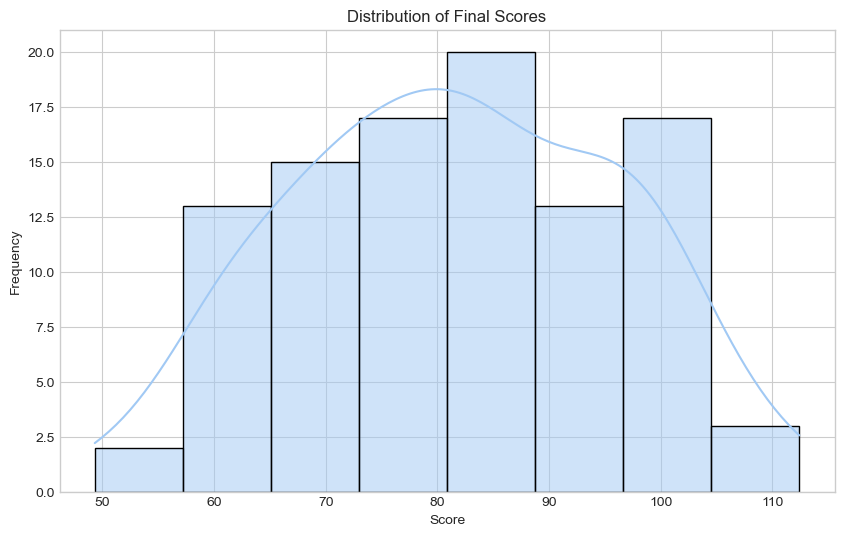

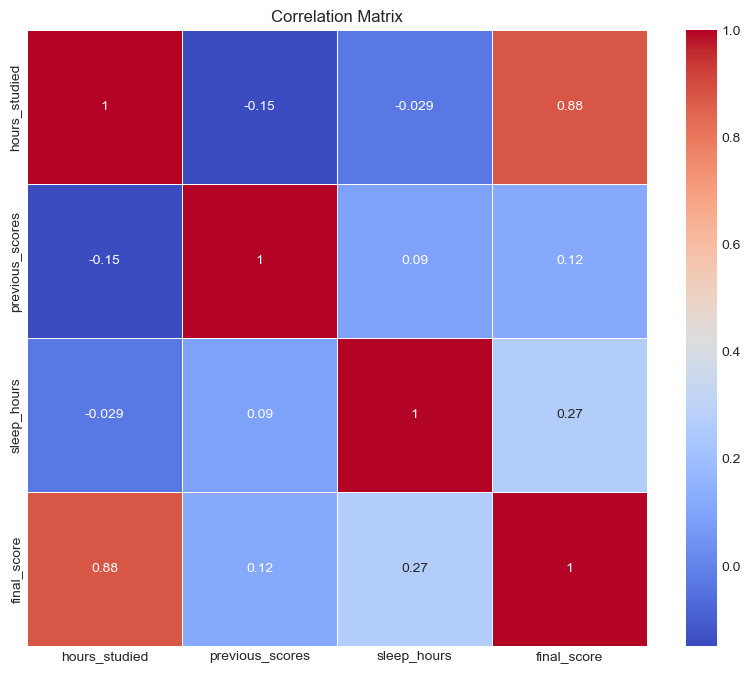

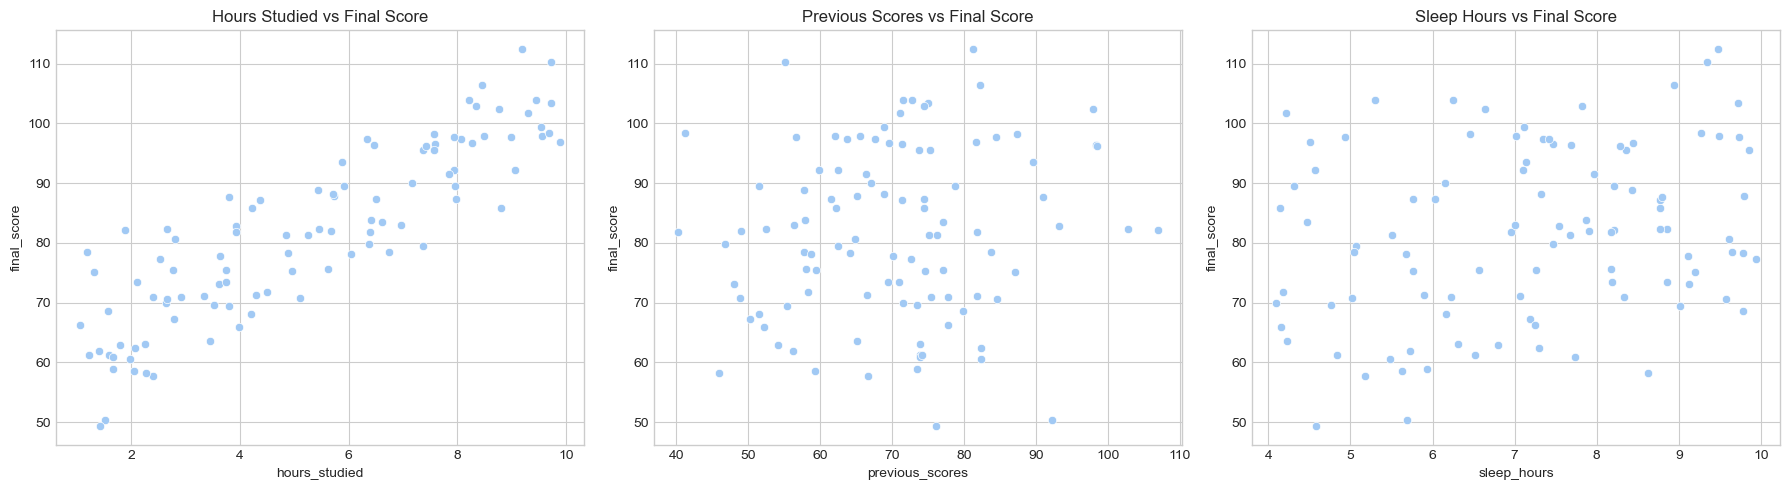

Training set size: 80
Testing set size: 20

Model Coefficients:
hours_studied: 4.9116
previous_scores: 0.2459
sleep_hours: 2.2373
Intercept: 22.8241

Model Performance:
Mean Squared Error: 16.8572
Root Mean Squared Error: 4.1058
R² Score: 0.9117


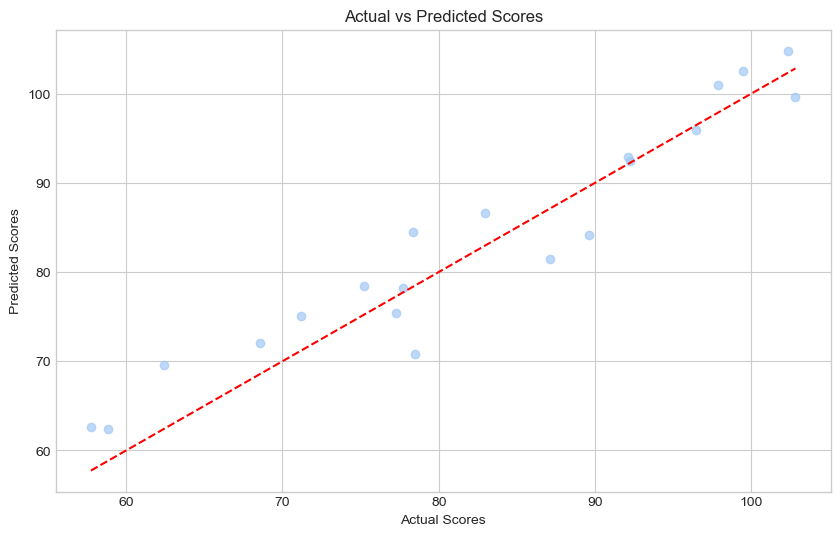

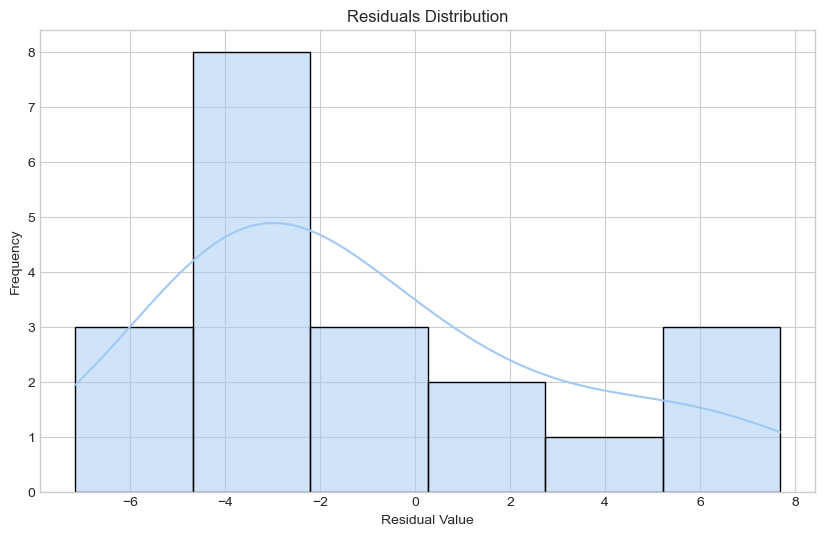

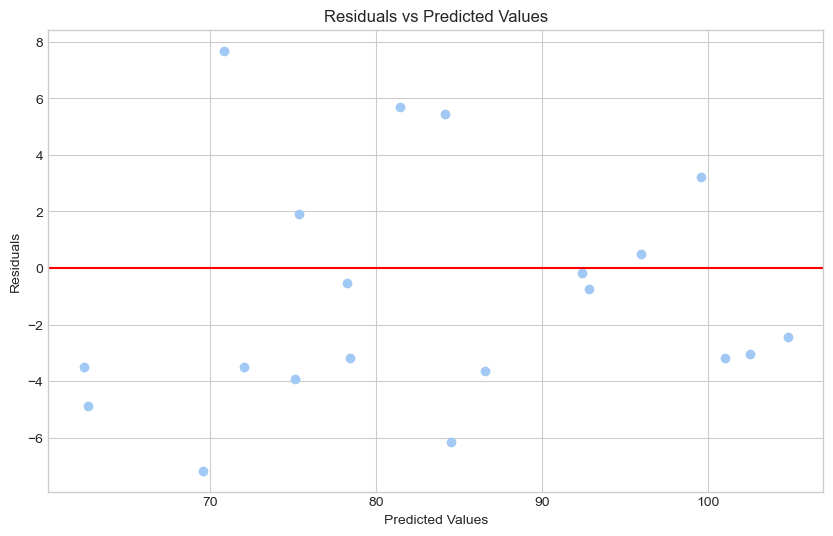

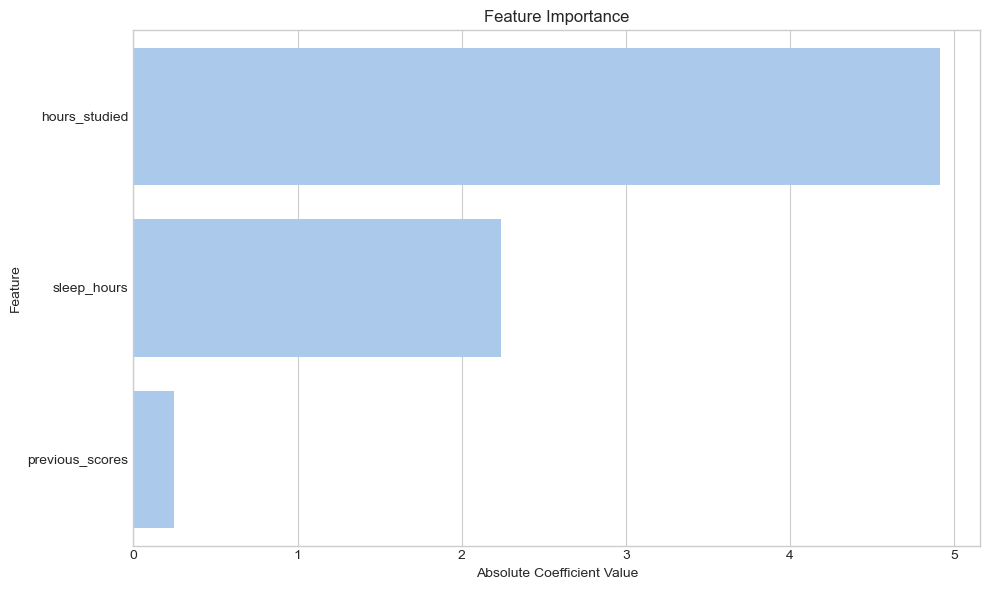

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Set the style for our visualizations
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("pastel")

# For reproducibility
np.random.seed(42)

# Step 1: Load the dataset
# If you have the Kaggle API set up:
# !kaggle datasets download -d spscientist/students-performance-in-exams
# !unzip students-performance-in-exams.zip

# create a simple dataset similar to student performance data
hours_studied = np.random.uniform(1, 10, 100)
previous_scores = np.random.normal(70, 15, 100)
sleep_hours = np.random.uniform(4, 10, 100)
# Generate final scores with some relationship to the features
final_scores = 20 + 5*hours_studied + 0.3*previous_scores + 2*sleep_hours + np.random.normal(0, 5, 100)

# Create a DataFrame
data = pd.DataFrame({
    'hours_studied': hours_studied,
    'previous_scores': previous_scores,
    'sleep_hours': sleep_hours,
    'final_score': final_scores
})

# Step 2: Data Exploration and Visualization
print("Dataset Overview:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Visualize the distribution of final scores
plt.figure(figsize=(10, 6))
sns.histplot(data['final_score'], kde=True)
plt.title('Distribution of Final Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

# Correlation analysis
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Scatter plots to visualize relationships
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(x='hours_studied', y='final_score', data=data, ax=axes[0])
axes[0].set_title('Hours Studied vs Final Score')
sns.scatterplot(x='previous_scores', y='final_score', data=data, ax=axes[1])
axes[1].set_title('Previous Scores vs Final Score')
sns.scatterplot(x='sleep_hours', y='final_score', data=data, ax=axes[2])
axes[2].set_title('Sleep Hours vs Final Score')
plt.tight_layout()
plt.show()

# Step 3: Split the dataset into training and testing sets
X = data[['hours_studied', 'previous_scores', 'sleep_hours']]
y = data['final_score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

# Step 4: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Print model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")

# Step 5: Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Step 6: Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')
plt.title('Actual vs Predicted Scores')
plt.grid(True)
plt.show()

# Step 7: Residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

# Step 8: Feature importance visualization
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_)
})
importance = importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()
